## Import library

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from google.colab import files

# **Nouvelle section**

## Import Data

In [2]:
import zipfile
import os

In [3]:
!unzip "/content/image.zip"
base_dir=r"/content/image"

Archive:  /content/image.zip
   creating: image/
   creating: image/angry/
  inflating: image/angry/0_R3hp9FQvNdqP8qaG.jpg  
  inflating: image/angry/1655043603_1-papik-pro-p-drawing-of-a-child-at-war-1.jpg  
  inflating: image/angry/3021cc31ca0ee35eecc00d14eead5175.jpg  
  inflating: image/angry/3151525500000578-3451517-image-a-10_1455734074794.jpg  
  inflating: image/angry/4720f7fb6a5c850c7f5f73a61b1879f4.jpg  
  inflating: image/angry/4bd89cecab5455ab9f6071fff5636d32--syrian-children-art-therapy.jpg  
  inflating: image/angry/628c737c26ed98bffa5ebb34af40ee0d.jpg  
  inflating: image/angry/6a00d8341d86ee53ef00e54f4a65478834-800wi.jpg  
  inflating: image/angry/6a00d8341d86ee53ef00e5508fbca38833-800wi.jpg  
  inflating: image/angry/6a00d8341d86ee53ef01b8d0648b4a970c.jpg  
  inflating: image/angry/750297f9436530e2d0d015dd93f09583.jpg  
  inflating: image/angry/88f2395c.jpg  
  inflating: image/angry/915f3482ce2597d90cdc199cc99097ca--broken-heart-art-online-art.jpg  
  inflating: image

## Preparing data

In [4]:
import zipfile, os

local ='/content/image.zip'
zip = zipfile.ZipFile(local, 'r')
# zip.extractall('/tmp')
zip.close()

base_dir = '/content/image'

In [5]:
os.listdir('/content/image')

['happiness', 'depression', 'angry']

In [6]:
data_generator = ImageDataGenerator(rescale= 1./255,
                                    horizontal_flip= True,
                                    vertical_flip= True,
                                    zoom_range= 0.2,
                                    # rotation_range= 90,
                                    shear_range= 0.2,
                                    validation_split= 0.3)

train = data_generator.flow_from_directory(base_dir,
                                           class_mode= 'categorical',
                                           batch_size= 16,
                                           target_size= (350, 350),
                                           subset='training')

validation = data_generator.flow_from_directory(base_dir,
                                           class_mode= 'categorical',
                                           batch_size= 16,
                                           target_size= (350, 350),
                                           subset='validation')

Found 102 images belonging to 3 classes.
Found 41 images belonging to 3 classes.


## Create  Custom callbacks

In [7]:
class Callbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nACCURACY 95!!!")
      self.model.stop_training = True

callback = Callbacks()

## Build Model

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(350, 350, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## Fitting model

In [9]:
history = model.fit(train,
                    epochs= 20,
                    verbose= 1,
                    # callbacks=[callback],
                    validation_data=validation)

Epoch 1/20
7/7 [==============================] - 22s 1s/step - loss: 1.1268 - accuracy: 0.2843 - val_loss: 1.1193 - val_accuracy: 0.3171
Epoch 2/20
7/7 [==============================] - 7s 938ms/step - loss: 1.1024 - accuracy: 0.3431 - val_loss: 1.0907 - val_accuracy: 0.3415
Epoch 3/20
7/7 [==============================] - 6s 804ms/step - loss: 1.0921 - accuracy: 0.4020 - val_loss: 1.0828 - val_accuracy: 0.3415
Epoch 4/20
7/7 [==============================] - 7s 918ms/step - loss: 1.0931 - accuracy: 0.3627 - val_loss: 1.0761 - val_accuracy: 0.3415
Epoch 5/20
7/7 [==============================] - 6s 803ms/step - loss: 1.0727 - accuracy: 0.4118 - val_loss: 1.0757 - val_accuracy: 0.3415
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 1.0330 - accuracy: 0.4902 - val_loss: 1.0463 - val_accuracy: 0.3415
Epoch 7/20
7/7 [==============================] - 6s 921ms/step - loss: 0.9927 - accuracy: 0.4804 - val_loss: 0.9951 - val_accuracy: 0.4390
Epoch 8/20
7/7 [=========

## Model evaluate

In [10]:
model.evaluate(validation, verbose=1)

3/3 [==============================] - 1s 451ms/step - loss: 0.7125 - accuracy: 0.7073


[0.7125323414802551, 0.707317054271698]

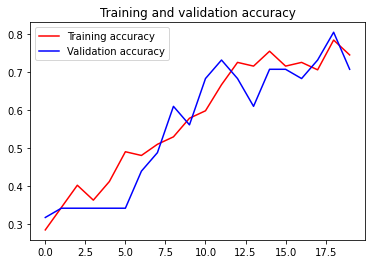

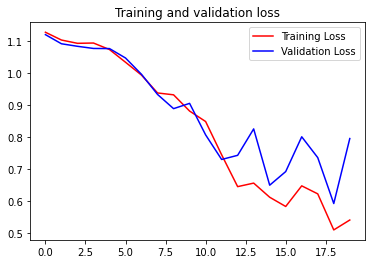

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Predict

In [12]:
class_names = train.class_indices
print(class_names)

{'angry': 0, 'depression': 1, 'happiness': 2}


In [13]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

Saving 1c52262f76afdb90c31bc4a55c039a81.jpg to 1c52262f76afdb90c31bc4a55c039a81.jpg
1/1 [==============================] - 0s 465ms/step
depression


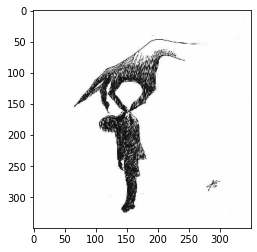

In [14]:
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(350,350, 3))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predict = model.predict(images)
  index = predict[0].argmax()

  for key,value in class_names.items():
    if value == index:
        print(key)
  

In [17]:
predict

array([[0., 1., 0.]], dtype=float32)

In [18]:
output = model(images)
output

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0., 1., 0.]], dtype=float32)>